# Titanic predication predict passenger survive or not

In [64]:
#importing important library
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sl
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [65]:
df=sns.load_dataset('titanic')

In [66]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [67]:
# Performing EDA

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [69]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [70]:
df.shape

(891, 15)

In [71]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [72]:
meanage=df['age'].mean()
meanage

29.69911764705882

In [73]:
df['age'].fillna(meanage,inplace=True)

In [74]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [75]:
df['embarked'].value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [76]:
df['embarked'].fillna('S',inplace=True)

In [77]:
check=df['deck'].value_counts()
check

C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64

In [78]:
df['deck'].fillna('C',inplace=True) 

In [79]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    2
alive          0
alone          0
dtype: int64

In [80]:
df['embark_town'].value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [81]:
df['embark_town'].fillna('Southampton',inplace=True) 

In [82]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         891 non-null    category
 12  embark_town  891 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [84]:
df['survived ']=df['survived'].astype('category')

In [85]:
df['pclass']=df['pclass'].astype('category')

In [86]:
df['sex']=df['sex'].astype('category')

In [87]:
df['embarked']=df['embarked'].astype('category')

In [88]:
df['age']=df['age'].astype('int')

In [89]:
survival_counts = df['survived'].value_counts()
survival_counts

0    549
1    342
Name: survived, dtype: int64

In [90]:
xdata=survival_counts.index
xdata

Int64Index([0, 1], dtype='int64')

In [91]:
ydata=survival_counts.values
ydata

array([549, 342], dtype=int64)

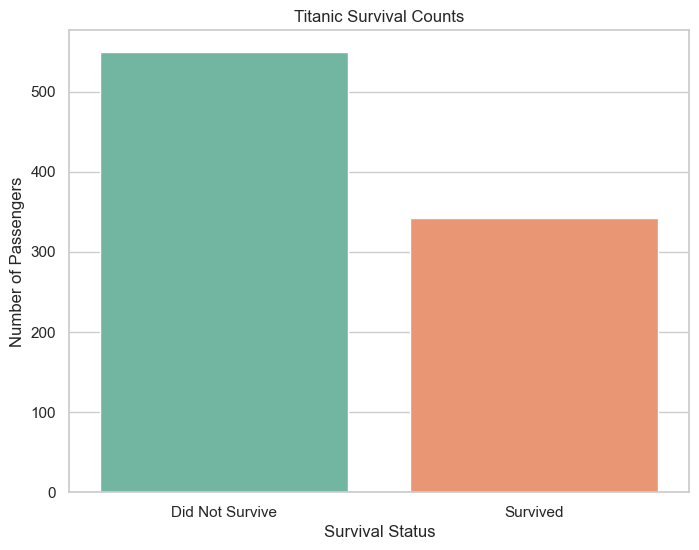

In [92]:
sns.set(style="whitegrid")#it will add  grid 

plt.figure(figsize=(8, 6))
sns.barplot(x=xdata, y=ydata, palette="Set2")#palette parameter is used for colours .The "Set2" palette typically contains a set of eight distinct colors


plt.xticks([0, 1], ['Did Not Survive', 'Survived'])#changing ticks for x axis
plt.xlabel('Survival Status')
plt.ylabel('Number of Passengers')
plt.title('Titanic Survival Counts')

plt.show()
#form this we can conclude that accident was very dangerous

In [93]:
sex_counts=df['sex'].value_counts()
sex_counts

male      577
female    314
Name: sex, dtype: int64

Text(0.5, 1.0, 'number of male and females')

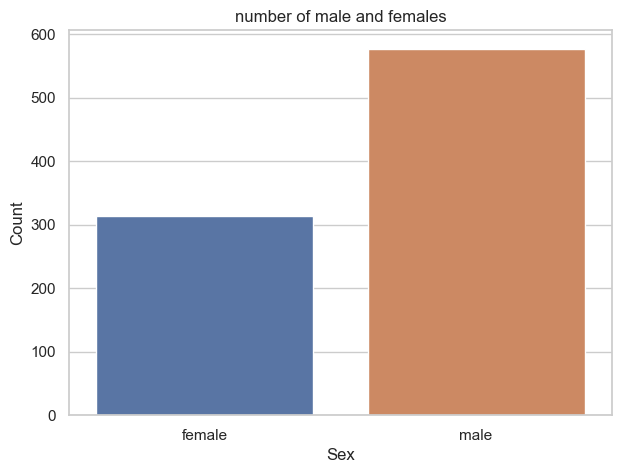

In [94]:
plt.figure(figsize=(7, 5))
sns.barplot(x=sex_counts.index, y=sex_counts.values)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('number of male and females')
#conclusion more number of male and female is travelling

In [95]:
#checking the sknewness of some columns
#note if skewness lies between -0.5 to 0.5 then it consider as normal distributions

In [96]:
df['fare'].skew()
# conclusions fare columns is  right skewed

4.787316519674893

In [97]:
df['age'].skew()
# conclusions age columns is normal distributions

0.45956263424701577

In [98]:
df['parch'].skew()
# conclusions parch columns is right skewed

2.7491170471010933

In [99]:
#Multivariate Analysis 
#survival with fare

C:\Users\btirk\AppData\Local\Temp\ipykernel_11160\831698126.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['survived']==0]['fare'],label='notsurvived')
C:\Users\btirk\AppData\Local\Temp\ipykernel_11160\831698126.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['survived']==1]

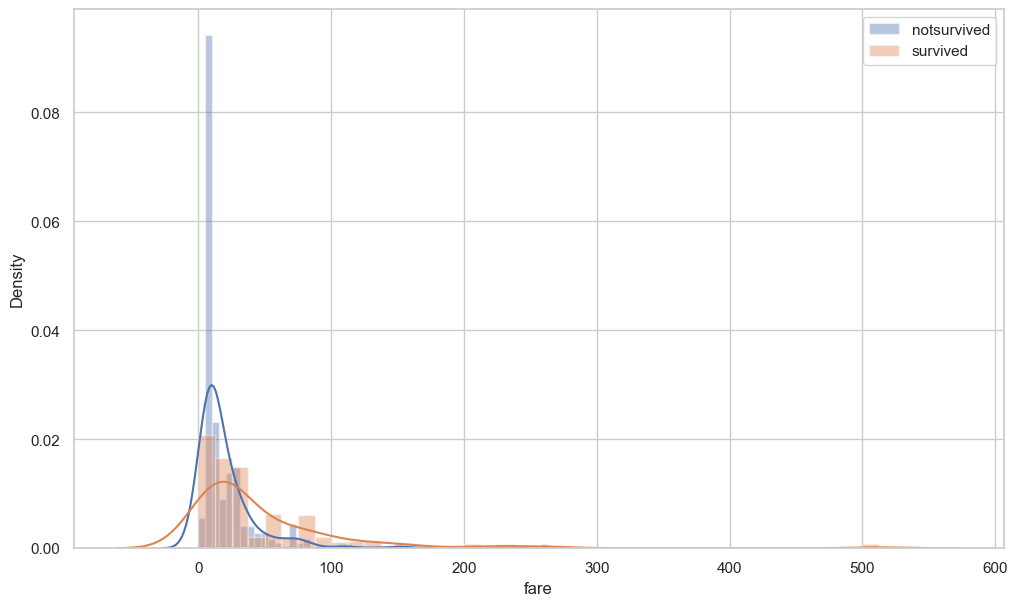

In [100]:
plt.figure(figsize=(12,7))
sns.distplot(df[df['survived']==0]['fare'],label='notsurvived')
sns.distplot(df[df['survived']==1]['fare'],label='survived')

plt.legend()
plt.show()

#it is showing that who have paid less have less chance of surviving 

C:\Users\btirk\AppData\Local\Temp\ipykernel_11160\223064664.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

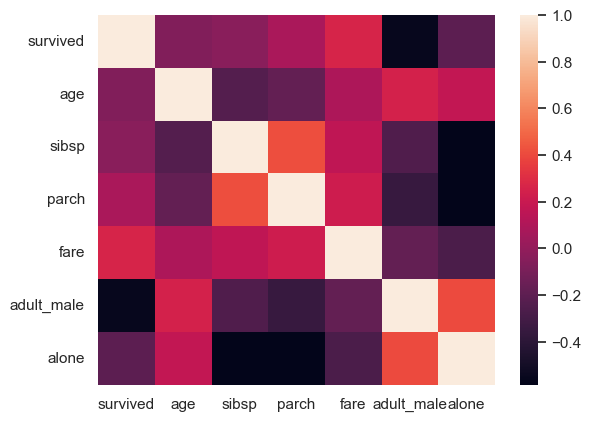

In [101]:
sns.heatmap(df.corr())
#conclusion fare is correlated with survived so we can say more the fare paid  more thhe chance of surviving  

In [102]:
# feature engineering 

In [103]:
#adding new column family 
df['family_size']=df['parch'] + df['sibsp'] #SibSp number of siblings or spouses aboard
                                            #Parch number of parents or children aboard

In [104]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,survived,family_size
0,0,3,male,22,1,0,7.2500,S,Third,man,True,C,Southampton,no,False,0,1
1,1,1,female,38,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1,1
2,1,3,female,26,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True,1,0
3,1,1,female,35,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,1,1
4,0,3,male,35,0,0,8.0500,S,Third,man,True,C,Southampton,no,True,0,0


In [105]:
# Define a function to categorize family sizes
def categorize_family_size(size):
    if size == 0:
        return 'Alone'
    elif 1 <= size < 6:
        return 'Medium'
    else:
        return 'Large'

In [106]:
df['familycategory'] = df['family_size'].apply(categorize_family_size)

In [107]:
check=df.groupby('familycategory')['survived'].mean().reset_index()
print(check)
#conclusion we can draw is that there is less chance of survival how travel alone

  familycategory  survived
0          Alone  0.303538
1          Large  0.160000
2         Medium  0.531915


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   survived        891 non-null    int64   
 1   pclass          891 non-null    category
 2   sex             891 non-null    category
 3   age             891 non-null    int32   
 4   sibsp           891 non-null    int64   
 5   parch           891 non-null    int64   
 6   fare            891 non-null    float64 
 7   embarked        891 non-null    category
 8   class           891 non-null    category
 9   who             891 non-null    object  
 10  adult_male      891 non-null    bool    
 11  deck            891 non-null    category
 12  embark_town     891 non-null    object  
 13  alive           891 non-null    object  
 14  alone           891 non-null    bool    
 15  survived        891 non-null    category
 16  family_size     891 non-null    int64   
 17  familycategory  

In [109]:
#now dropping sibsp,parch and family size 

df.drop(['deck', 'alive', 'who', 'adult_male', 'embark_town', 'alive', 'class', 'alone'], axis=1, inplace=True)

In [110]:
# handle outliers from fare column using interquartile method 

In [111]:
q1=np.percentile(df['fare'],25)
q1

7.9104

In [112]:
q3=np.percentile(df['fare'],75)
q3

31.0

In [113]:
outlier_low=q1-1.5*(q3-q1)
outlier_low

-26.724

In [114]:
outlier_high=q3+1.5*(q3-q1)
outlier_high

65.6344

In [115]:
df=df[(df['fare']>outlier_low)&(df['fare']<outlier_high)]

In [116]:
# applying one hot encoding columns to be changed are pclass,sex,embarked,family_type 

In [117]:
df=pd.get_dummies(data=df,columns=['pclass','sex','embarked','familycategory'],drop_first=True)#new columns will be created in which first columns is removed

In [118]:
df.head()

,survived,age,sibsp,parch,fare,survived,family_size,pclass_2,pclass_3,sex_male,embarked_Q,embarked_S,familycategory_Large,familycategory_Medium
0,0,22,1,0,7.2500,0,1,0,1,1,0,1,0,1
2,1,26,0,0,7.9250,1,0,0,1,0,0,1,0,0
3,1,35,1,0,53.1000,1,1,0,0,0,0,1,0,1
4,0,35,0,0,8.0500,0,0,0,1,1,0,1,0,0
5,0,29,0,0,8.4583,0,0,0,1,1,1,0,0,0


C:\Users\btirk\AppData\Local\Temp\ipykernel_11160\2524940848.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

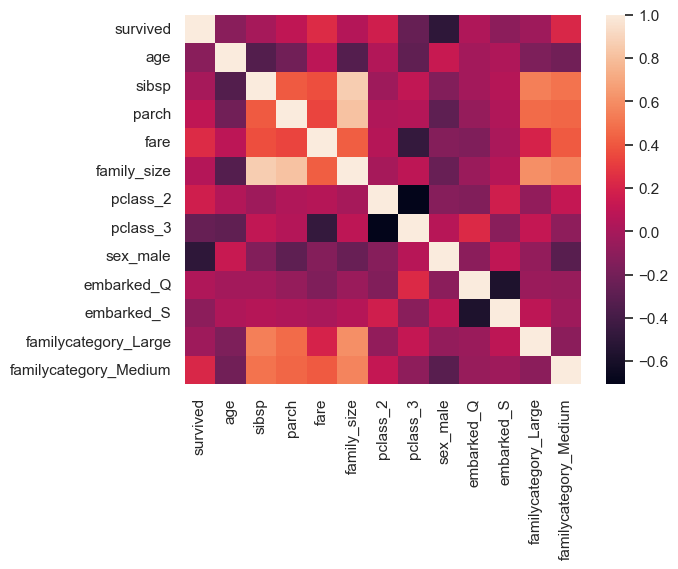

In [119]:
sns.heatmap(df.corr())
#smaller family had a higher chance of surviving
#chance of female survival is higher than male survival

<Figure size 3000x1700 with 0 Axes>

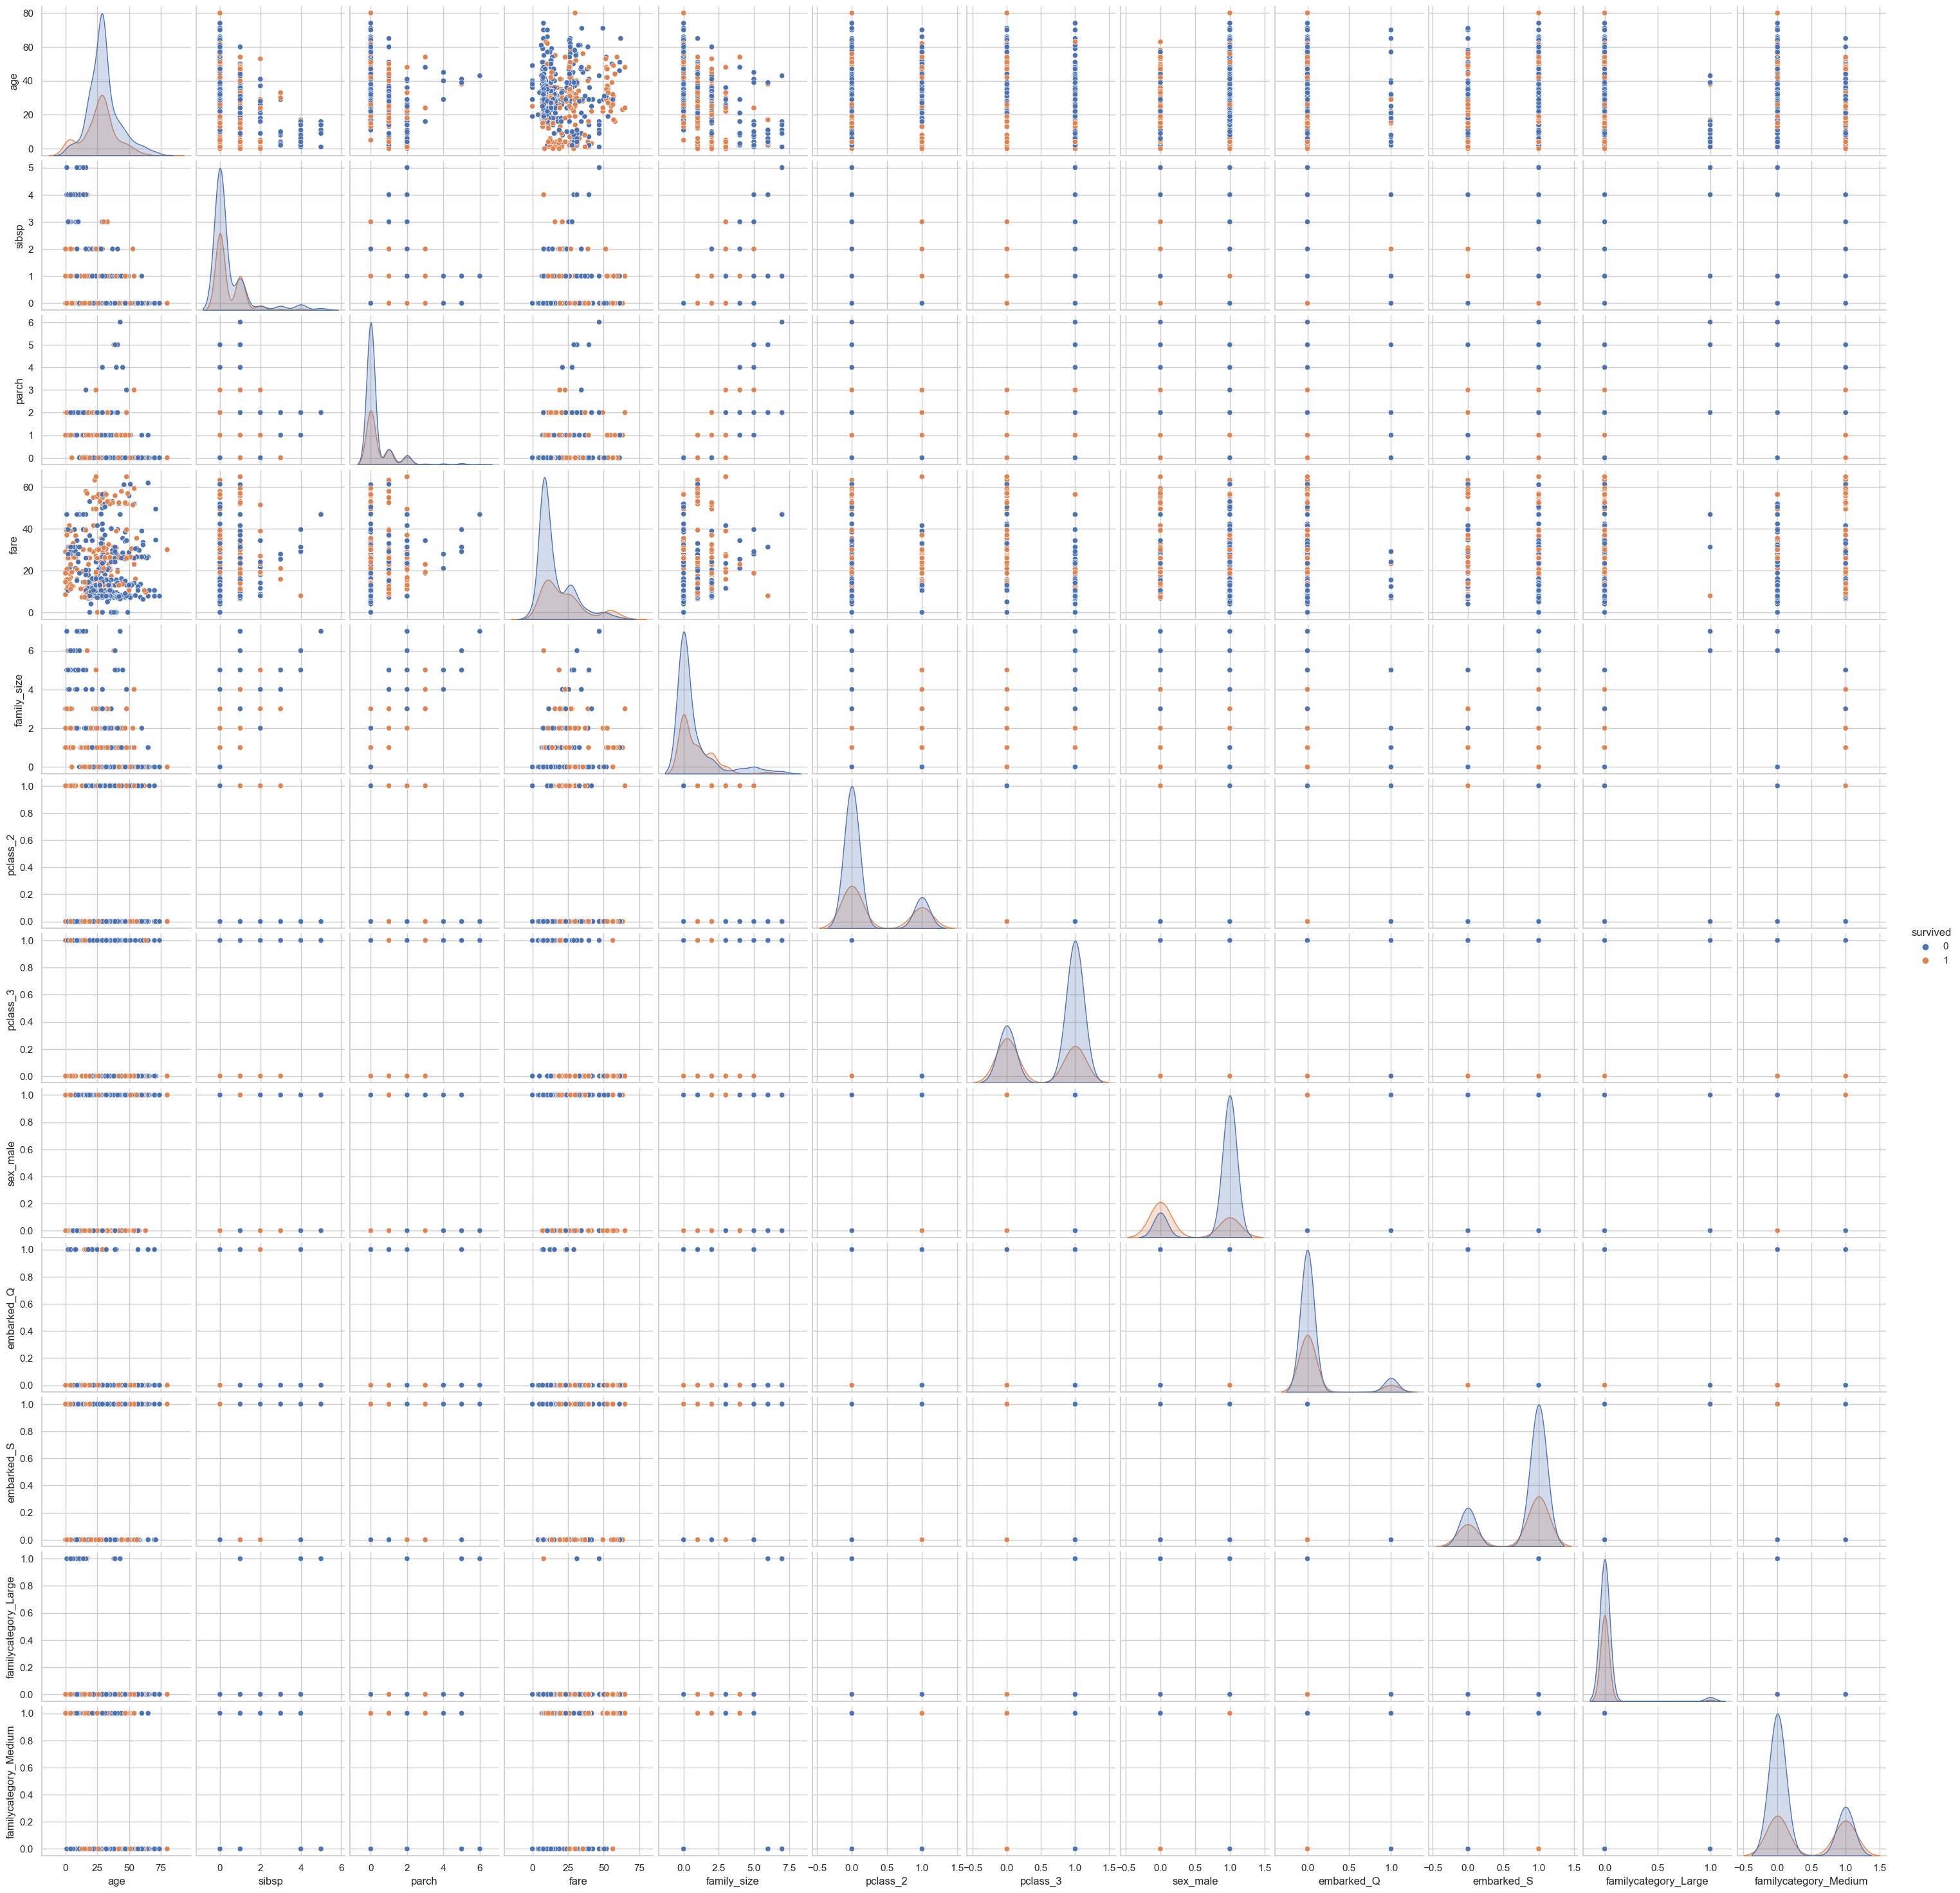

<Figure size 3000x1700 with 0 Axes>

In [120]:
#making pair plot to know more about survive
sns.pairplot(df,hue='survived')
plt.figure(figsize=(30,17))

# using knn to predict passenger will survive or not

In [121]:
X = df.drop('survived', axis=1)
y = df['survived']

In [122]:
# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [123]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [124]:
# Create and train the k-NN classifier (you can choose the number of neighbors, 'n_neighbors')
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [125]:
# Make predictions
y_pred = knn_classifier.predict(X_test)

# Evaluate the k-NN model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')#The accuracy is formatted as a floating-point number 
print(f'Confusion Matrix:\n{conf_matrix}') #The confusion matrix is displayed as a formatted string with line breaks which contains True Positives (TP),True Negatives (TN),False Positives (FP),False Negatives (FN)
print(f'Classification Report:\n{classification_rep}')


Accuracy: 0.97
Confusion Matrix:
[[94  1]
 [ 4 56]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        95
           1       0.98      0.93      0.96        60

    accuracy                           0.97       155
   macro avg       0.97      0.96      0.97       155
weighted avg       0.97      0.97      0.97       155

